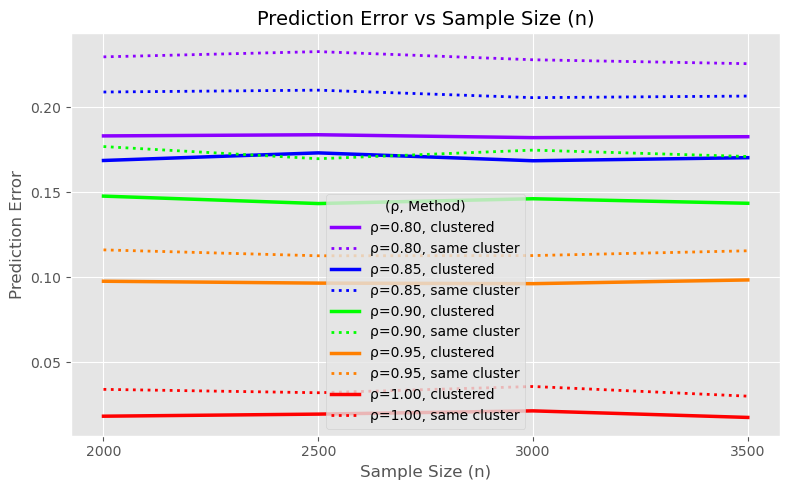

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import re

# === Setup paths ===
results_dir = "/home/sagnik/Research/Hierarchical_AMP/Results/pred_vary_rho"
plot_dir = "/home/sagnik/Research/Hierarchical_AMP/Plots/pred_vary_rho"
os.makedirs(plot_dir, exist_ok=True)

# === Load and combine CSV files ===
csv_files = sorted(glob.glob(os.path.join(results_dir, "prediction_results_n_*.csv")))
records = []

for file in csv_files:
    match = re.search(r"prediction_results_n_(\d+)\.csv", os.path.basename(file))
    if match:
        n_val = int(match.group(1))
        df = pd.read_csv(file)
        df["n"] = n_val
        records.append(df)

# Combine into single dataframe
combined_df = pd.concat(records, ignore_index=True)
combined_df = combined_df[["n", "rho", "pred_clustered", "pred_same_cluster", "pred_distinct_clusters"]]
combined_df = combined_df.sort_values(["n", "rho"])

# Save combined CSV
combined_csv_path = os.path.join(results_dir, "combined_prediction_results_vary_rho.csv")
combined_df.to_csv(combined_csv_path, index=False)

# === Step 3: Plotting ===
plt.style.use("ggplot")

# VIBGYOR color list
vibgyor_colors = [
    "#8B00FF",  # Violet
    "#0000FF",  # Blue
    "#00FF00",  # Green
    "#FF7F00",  # Orange
    "#FF0000"   # Red
]

# Ensure rho values are sorted
unique_rhos = sorted(combined_df["rho"].unique())
if len(unique_rhos) > len(vibgyor_colors):
    raise ValueError("More rho values than VIBGYOR colors provided.")

rho_to_color = {rho: vibgyor_colors[i] for i, rho in enumerate(unique_rhos)}

# === Plot prediction error vs n for each rho ===
plt.figure(figsize=(8, 5))

for rho in unique_rhos:
    sub_df = combined_df[combined_df["rho"] == rho].sort_values("n")
    
    # Clustered AMP (solid line)
    plt.plot(
        sub_df["n"],
        sub_df["pred_clustered"],
        label=f"ρ={rho:.2f}, clustered",
        color=rho_to_color[rho],
        linestyle="-",
        linewidth=2.5
    )

    # Same Cluster AMP (dotted line)
    plt.plot(
        sub_df["n"],
        sub_df["pred_same_cluster"],
        label=f"ρ={rho:.2f}, same cluster",
        color=rho_to_color[rho],
        linestyle=":",
        linewidth=2
    )

plt.title("Prediction Error vs Sample Size (n)", fontsize=14)
plt.xlabel("Sample Size (n)", fontsize=12)
plt.ylabel("Prediction Error", fontsize=12)
plt.xticks(sorted(combined_df["n"].unique()))
plt.legend(title="(ρ, Method)", fontsize=10)
plt.tight_layout()

# Save and show the plot
plot_path = os.path.join(plot_dir, "prediction_error_vs_n.png")
plt.savefig(plot_path, dpi=150)
plt.show()